[Back to Overview](overview.ipynb)

# The Object Oriented Paradigm

We have learned that a Python class is somewhat akin to a dict.  That's a good [segue to JavaScript](https://javascript.info/class) by the way, which also uses the dict as the basis for its object.

Objects are containers that carry around special case state, or call it data, while sharing common abilities to work with that state.  A number contains an ability it shares with other numbers:  the ability to add, multiply, and otherwise work with peers.

Below, a simplest Python class, from which ```I``` template we might derive any number of ```me``` instances.  To avoid name collisions, the instances need different names and/or need to be saved in different "namespaces".  We may also store objects more anonymously inside of collections.

```python
class I:
   pass
```

is sufficient syntax to create an instance, say ```me```, to which way may then assign attributes, thereby creating ```me.__dict__```. 

In [1]:
class I:
    pass

me = I()
metoo = I()
dozen = [I() for i in range(12)]
dozen[1:3]

[<__main__.I at 0x106d6b9b0>, <__main__.I at 0x106d6b9e8>]

## INHERITANCE

Lets do that some more:

In [2]:
class I(object):  # inheriting from
   """simple class"""
   pass

me = I()
metoo = I()
me.hungry = True
metoo.hungry = False

import math       # importing a namespace
math.me = I()     # tucking me inside
math.me.hungry = None  # dot notation setattr, likewise an object in memory
print("me.hungry: {}\nmetoo.hungry: {}\nmath.me.hungry: {}".
      format(*(me, metoo, math.me)))

me.hungry: <__main__.I object at 0x106d935f8>
metoo.hungry: <__main__.I object at 0x106d935c0>
math.me.hungry: <__main__.I object at 0x106d6b908>


Note that none of these instances represent themselves in a customized way.  The representations above are the "plain vanilla" or "out of the box" representations.  

The I type is inheriting a magic method named ```__repr__``` from its ```object``` ancestor class.

```object``` need not be explicitly subclassed by ```I``` in order to serve as the root parent (provided by the Python language).

### LORE

In older versions of Python (2.x), you may see ```object``` explicitly subclassed, because for awhile two types of classes co-existed, the "new style" classes having explicit ```object``` for a parent.  

By Python 3.x, the "old style" class had been phased out, so subclassing ```object``` became unnecessary and redundant.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/internetarchivebookimages/14577615327/in/photolist-odb6ai-owt6aT-ousngN-owbdS8-wD4C7L-xBUHNc-t3LxYn-ovbr4b-oyaPpB-yooDvw-w7fA4G-y5Q1xh-xnVUZC-wEZsLh-x7KZoh" title="Image from page 263 of &quot;St. Nicholas [serial]&quot; (1873)"><img src="https://farm6.staticflickr.com/5568/14577615327_8b45a73aaf.jpg" width="500" height="180" alt="Image from page 263 of &quot;St. Nicholas [serial]&quot; (1873)"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

"Special names" look like ```__ribs__``` and provide the scaffolding for the Python language.

The Socratica channel on Youtube does a good job summarizing Python.  Now that you have almost completed your SAISOFT course (assuming you've gotten this far), the content below should seem quite familiar:

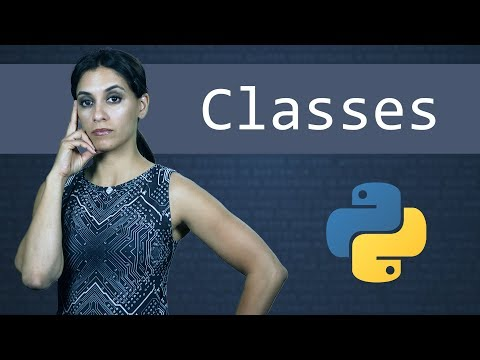

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("apACNr7DC_s")

## OVERRIDING / OVERLOADING

Now let's intercept the Method Resolution Order (MRO, see below) and interpose our own version of ```__repr__```.  The change is actually somewhat subtle.  Feel free to make more obvious and exaggerated alterations:

In [4]:
class I:
    def __repr__(self):
        return "An I object at id='{}'".format(id(self))

me = I()
me.attribute = "value"
print("{} has a __dict__,\nthe contents of which are: {}"
      .format(me, me.__dict__))

An I object at id='4410043360' has a __dict__,
the contents of which are: {'attribute': 'value'}


### COMPARING WITH JAVASCRIPT
Look how like a Python dict is this JavaScript ```person``` object.  It happens to have a function inside, which has access to other items in the dict, through the keyword ```this```.

The braces suggest a dict with items inside, and that's not a misleading way to look at a primitive JS object.

Open your browser's console to see the output from the JavaScript below, or change ```console.log``` to ```alert``` to get a modal window with the output.

In [5]:
%%javascript
let person = {
    firstName: "John",
    lastName : "Doe",
    id       : 5566,
    fullName : function() {
        return this.firstName + " " + this.lastName;
    }
};
console.log(person.fullName())

<IPython.core.display.Javascript object>

The Python below is a little quirky, yet shows how we might save some functionality as the value of some key, in the form of a lambda expression.  

Called without arguments, the lambda expression refers to the very dict it's contained within, i.e. person, the containing dict, is fingered from what we might call a "3rd person" point of view.  The point of '''this''' and Python's '''self''' is to give us a handle on an instance using a more "1st person" grammar that does not depend on the 3rd person name of the object.

### THE GRAMMAR OF SELFHOOD

In other words, ```this``` and ```self``` always point to "this very instance" (whatever that may be) whereas the lambda expression saved below has no such power to generalize to any dict, regardless of name.

In [6]:
person = {"firstName": "John", 
          "lastName": "Doe", 
          "fullname": lambda: person["firstName"] + " " + person["lastName"]}
person["fullname"]()

'John Doe'

Here's a way to incorporate HTML into what we display as cell output.  We're only adding to our Python namespace, not to JavaScript.

In [7]:
from IPython.core.display import display, HTML
display(HTML('<h3>Hello, world!</h3>'))

The Python class below looks a lot like the JavaScript class the follows.

In [8]:
class User:
    def __init__(this, name):  # instead of self
        this.name = name
    def say_hi(this):
        display(HTML("<i>Hello, world</i>"))
    
user = User("A")
user.say_hi()

Compare the code above with the code below.  Open your browser console to see the output here.

In [9]:
%%javascript

class User {
  constructor(name) { this.name = name; }
  sayHi() { console.log(this.name); }
}

let user = new User("John Doe");
user.sayHi();

<IPython.core.display.Javascript object>

## MULTIPLE INHERITANCE

Inheritance allows us to define classes as subclass of one another, meaning we're able to propagate the meaning of certain methods down through the child classes.

Since Python permits multiple parent classes, not just one, nor even just two, graphing out what's called "method resolution order" (the route by which method names are resolved) may be a little tricky.

In [10]:
import mro_research

In [11]:
subject = mro_research.Noah()  # module mro_research will be in your Session folder

__init__ of Gen0
__init__ of Eve
__init__ of Adam
__init__ of Azura
__init__ of Seth
__init__ of Enosh
__init__ of Kenan
__init__ of Mahalaleel
__init__ of Jared
__init__ of Enoch
__init__ of Elisha
__init__ of Ashmua
__init__ of Methusela
__init__ of Lamech
__init__ of Noah


In [12]:
from inspect import getmro
getmro(mro_research.Noah)

(mro_research.Noah,
 mro_research.Lamech,
 mro_research.Methusela,
 mro_research.Ashmua,
 mro_research.Elisha,
 mro_research.Enoch,
 mro_research.Jared,
 mro_research.Mahalaleel,
 mro_research.Kenan,
 mro_research.Enosh,
 mro_research.Seth,
 mro_research.Azura,
 mro_research.Adam,
 mro_research.Eve,
 mro_research.Gen0,
 object)

## CLASS AND STATIC METHODS

Sometimes your logic needs to work with the class itself and the names defined at that level, not with the guts of any instance.  In that case, the @classmethod decorator is your friend, as it ensures the leftmost parameter will bind to the class itself instead of the instance.  You will often see names such as ```cls``` or ```klass``` to avoid using the keyword ```class```.  We must avoid actual Python keywords as the names of parameters or arguments.

Additionally, your logic may not need a reference to the instance or containing class at all, in which case @staticmethod will do just fine as a decorator.  A static method is just like a standalone function, which just happens to make more sense as a member of a class.  Perhaps it returns a version number.

In [13]:
# -*- coding: utf-8 -*-
"""
A look at classmethod and staticmethod in situ
"""

from random import choice

class Animal:
    
    tricks = ["jumping", "playing dead", 
              "rolling over", "walking backwards"]
    
    def __init__(self, name, species, age, fav_food):
        self.name = name
        self.species = species
        self.__dict__["age"] = age # alternative to self.age = age
        self.fav_food = fav_food
        self.stomach = [ ]
    
    @classmethod
    def add_trick(cls, new_trick):
        cls.tricks.append(new_trick)
    
    @staticmethod
    def version():
        return "version 1.0.1"
        
    def eat(self, food):
        if food == self.fav_food:
            print("Yummy, that's my favorite")
        else:
            print("OK, but that's not a", self.fav_food)
        self.stomach.append(food)
        
    def do_trick(self):
        if len(self.stomach) == 0:
            print("Sorry, I'm too hungry to do tricks")
        else:            
            print("Look at me, {}!  I'm {}!".format(self.name, 
                                      choice(self.tricks)))
            self.stomach.pop(0)

    def __str__(self):
        return "Hi!  My name is '{}'".format(self.name)
        
    def __repr__(self):
        return "Animal(name='{}', species='{}')".format(self.name, self.species)
        
some_animal = Animal("JoJo", "Monkey", 3, "banana")
some_animal.eat("banana")
print(repr(some_animal))  # force __repr__
print(some_animal)        # print calls __str__ if it finds one
some_animal.do_trick()
some_animal.eat("potato")
some_animal.do_trick()
some_animal.do_trick()
some_animal.eat("fritos")
some_animal.do_trick()

Yummy, that's my favorite
Animal(name='JoJo', species='Monkey')
Hi!  My name is 'JoJo'
Look at me, JoJo!  I'm walking backwards!
OK, but that's not a banana
Look at me, JoJo!  I'm rolling over!
Sorry, I'm too hungry to do tricks
OK, but that's not a banana
Look at me, JoJo!  I'm rolling over!


## PROPERTIES

Finally, lets talk about the @property decorator, which will allow the setting and getting of attributes to trigger setter and getter methods.  There's even a deleter method.  

In your Lab, you will get the source code for MagicCircle, which changes any two attributes in response to the user setting a third.

For example, if you set the area, circumference and radius will change accordingly.

In [14]:
from magic_circle_v2 import Circle

c = Circle()
print("Default radius:        {:15.5f}".format(c.radius))
print("Default circumference: {:15.5f}".format(c.circumference))

c.area = 10
print("New radius:            {:>15.5f}".format(c.radius))
print("New circumference:     {:>15.5f}".format(c.circumference))

Default radius:                1.00000
Default circumference:         6.28319
New radius:                    1.78412
New circumference:            11.20998


A deeper understanding of @property (how it works) requires some experience with the idea of a Descriptor class, which implements ```__get__``` and ```__set__```.  Such objects trigger code when values are either fetched from or assigned to them.  Your instructor will go over all this with you, plus share a link to [the Python documentation](https://docs.python.org/3/howto/descriptor.html#properties).